### Problem Statement 

# Predict the quality of the wine.

# Comprehensive Machine Learning Project

### Data Set Information:

The dataset was downloaded from the UCI Machine Learning Repository.
The two datasets are related to red and white wine variants of the Portguese Vinho Verde Wine

This is a classsical  dataset to perform both regression and classification tasks on this data.

We will explore Outlier Detection and Treatment, Feature Selection and Handling Imbalanced Datasets


In [1]:
# Here we will import the libraries used for Machine Learning

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. I like it most for plot
%matplotlib inline


from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split, GridSearchCV  # to split the data into two parts
from sklearn.model_selection import KFold, cross_val_score  # use for K- fold cross validation
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm # for Support Vector Machine
from sklearn import metrics # for the check the error and accuracy of the model

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score,average_precision_score, precision_score, confusion_matrix, classification_report

In [2]:
from sklearn.model_selection import GridSearchCV# for tuning parameter
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. I like it most for plot
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score


from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime

In [4]:
# Importing and Loading the Dataset

dataset = pd.read_csv('D:\\R-Projects\\winequalityN.csv')
print (dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
type                    6497 non-null object
fixed acidity           6487 non-null float64
volatile acidity        6489 non-null float64
citric acid             6494 non-null float64
residual sugar          6495 non-null float64
chlorides               6495 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6488 non-null float64
sulphates               6493 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB
None


### Data Understanding 

In [5]:
# Loading the first 3 records in the dataset

dataset.head(3)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


In [6]:
# Explore the data type of the features
dataset.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [10]:
#print('This dataset contains ',dataset.shape[0],'rows')
#print('This dataset contains ',dataset.shape[1],'columns')
dataset.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [11]:
dataset.describe

<bound method NDFrame.describe of        type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0             0.270         0.36            20.7   
1     white            6.3             0.300         0.34             1.6   
2     white            8.1             0.280         0.40             6.9   
3     white            7.2             0.230         0.32             8.5   
4     white            7.2             0.230         0.32             8.5   
...     ...            ...               ...          ...             ...   
6492    red            6.2             0.600         0.08             2.0   
6493    red            5.9             0.550         0.10             2.2   
6494    red            6.3             0.510         0.13             2.3   
6495    red            5.9             0.645         0.12             2.0   
6496    red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  tot

In [12]:
# Exploring the  Target Variable
dataset['type'].value_counts()

white    4898
red      1599
Name: type, dtype: int64

In [22]:
# Quick Visualization of The Target Variable

#This works but commended
#plt.figure(figsize=(4,4))
#pd.Series(dataset['type']).value_counts().plot(kind ='pie', autopct='%1.2f%%')

import plotly.express as px

dataset = px.data.tips()
fig = px.pie(dataset, values='tip', names='day')
ax.legend(wedges, Types,
          title="Types",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
fig.show()

ModuleNotFoundError: No module named 'plotly'

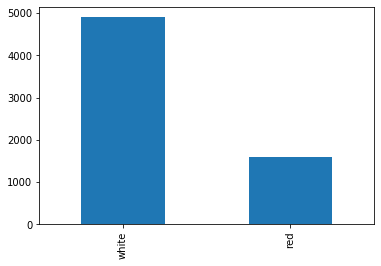

In [34]:
# bar plot
dataset['type'].value_counts().head(10).plot.bar()


In [14]:
labels_count = dataset.type.value_counts()
total_labels = dataset.type.count()
(labels_count/total_labels)

white    0.753886
red      0.246114
Name: type, dtype: float64

In [23]:
dataset.columns.unique()

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [24]:
types_train =dataset.dtypes
num_values = types_train[(types_train == float)]

print("These are the Numerical Features:")
print(num_values)

These are the Numerical Features:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
dtype: object


In [25]:
dataset['type'].groupby(pd.qcut(dataset['sulphates'], 3)).value_counts()

sulphates      type 
(0.219, 0.46]  white    2282
               red        72
(0.46, 0.56]   white    1572
               red       408
(0.56, 2.0]    red      1117
               white    1042
Name: type, dtype: int64

## Data Transformation / Feature Engineering

In [35]:
## Removing duplicates in the dataset

dataset.drop_duplicates(keep=False, inplace=True)

In [36]:
## Converting the Target Variable to Binary for later Visualization Plots and Modelling Purposes

dataset['type']=dataset['type'].map({'white':1,'red':0})

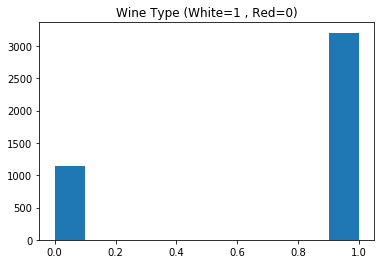

In [38]:
#dataset.describe()
plt.hist(dataset['type'])
plt.title('Wine Type (White=1 , Red=0)')
plt.show()

,Total,Percent
fixed acidity,10,0.002301
pH,9,0.002071
volatile acidity,8,0.001841
sulphates,4,0.000920
citric acid,3,0.000690


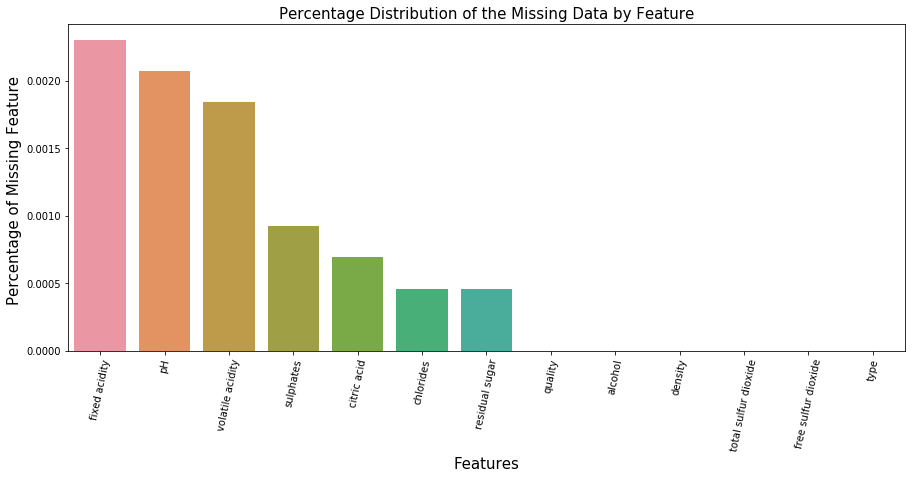

In [40]:
total = dataset.isnull().sum().sort_values(ascending=False)
percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='78')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percentage of Missing Feature ', fontsize=15)
plt.title('Percentage Distribution of the Missing Data by Feature', fontsize=15)
missing_data.head()

#### Treating the Missing Values Using the Median Imputation

In [41]:
df4 = dataset
df4['fixed acidity'].fillna(df4['fixed acidity'].median(),inplace=True)

In [42]:
df4 = dataset
df4['volatile acidity'].fillna(df4['volatile acidity'].median(),inplace=True)

In [43]:
df4 = dataset
df4['sulphates'].fillna(df4['sulphates'].median(),inplace=True)

In [ ]:
df4 = dataset
df4['pH'].fillna(df4['pH'].median(),inplace=True)

In [44]:
df4 = dataset
df4['citric acid'].fillna(df4['citric acid'].median(),inplace=True)

In [45]:
df4 = dataset
df4['residual sugar'].fillna(df4['residual sugar'].median(),inplace=True)

In [46]:
df4 = dataset
df4['chlorides'].fillna(df4['chlorides'].median(),inplace=True)

In [47]:
# Checking for any Missing Values after Imputation

missing_df =dataset.isnull().sum(axis=0).reset_index()
missing_df.columns = ['Column Name', 'Missing Values Count']
missing_df['Filling Factor (%)']=(dataset.shape[0]-missing_df['Missing Values Count'])/dataset.shape[0]*100
missing_df.sort_values('Filling Factor (%)').reset_index(drop = True)

,Column Name,Missing Values Count,Filling Factor (%)
0,pH,9,99.792913
1,type,0,100.000000
2,fixed acidity,0,100.000000
3,volatile acidity,0,100.000000
4,citric acid,0,100.000000
5,residual sugar,0,100.000000
6,chlorides,0,100.000000
7,free sulfur dioxide,0,100.000000
8,total sulfur dioxide,0,100.000000
9,density,0,100.000000


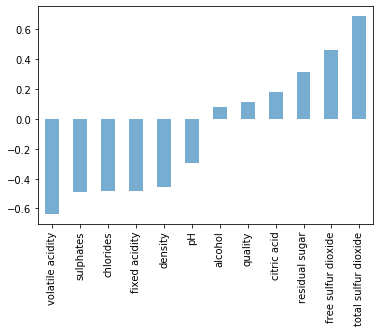

In [48]:
# Observe the Correlation to the Target Variable

tst = dataset.corr()['type'].copy()
tst = tst.drop('type')
tst.sort_values(inplace=True)
tst.plot(kind='bar', alpha=0.6)

## Exploratory Data Analysis

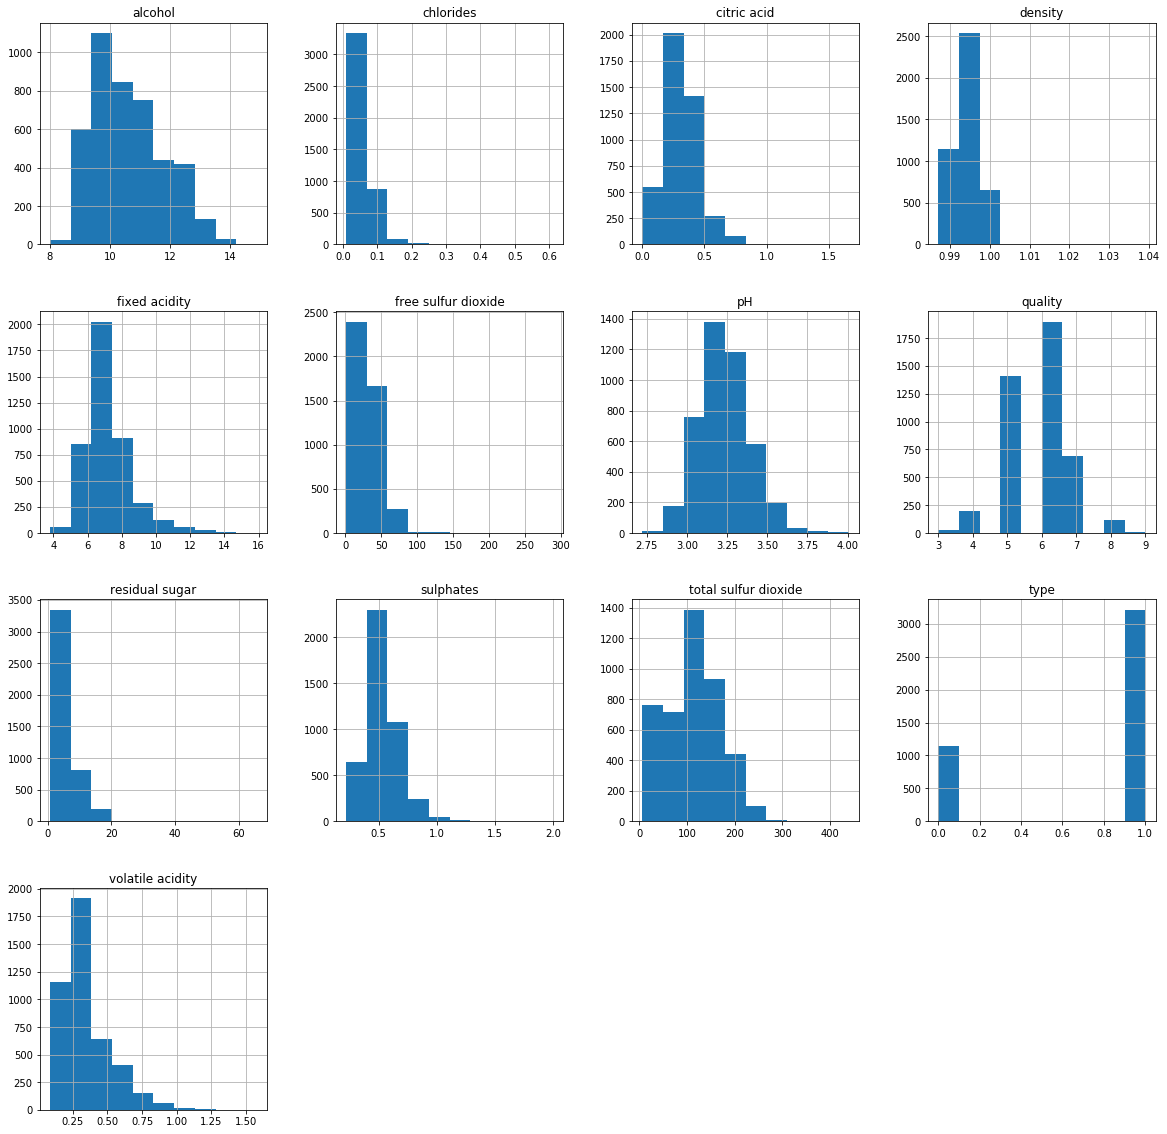

In [49]:
# Plotting the Histogram for each variable

dataset.hist(figsize = (20, 20))
plt.show()

# Detecting and Treating Outliers

### Visualization of the Numerical Variables in the dataset

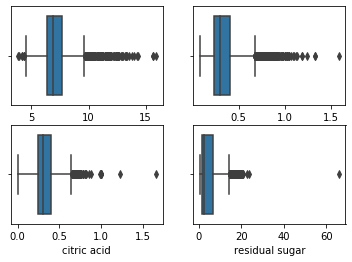

In [50]:
cont_names=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar']

        
#sns.boxplot(dataset['season'])   
i=0
for name in cont_names:
    i=i+1
    plt.subplot(2,2,i)
    sns.boxplot(name,data=dataset) 
    
plt.show()

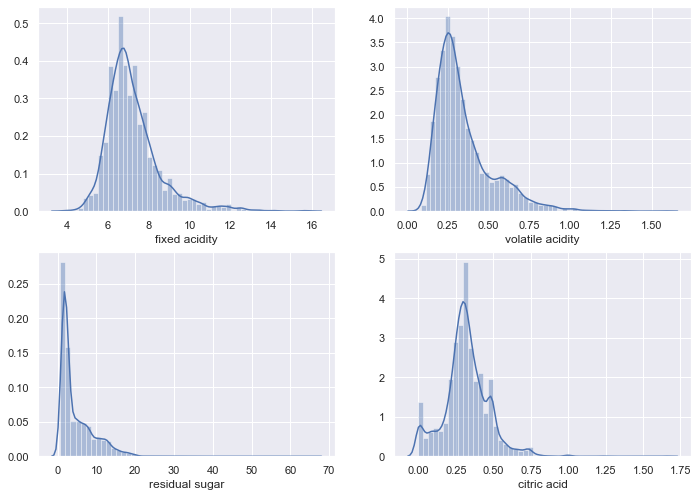

In [51]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig, ax = plt.subplots(2,2)
sns.distplot(dataset['fixed acidity'],ax=ax[0,0]);
sns.distplot(dataset['volatile acidity'],ax=ax[0,1]);
sns.distplot(dataset['residual sugar'],ax=ax[1,0]);
sns.distplot(dataset['citric acid'],ax=ax[1,1]);

In [ ]:
cont_names=['chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density']

        
#sns.boxplot(dataset['season'])   
i=0
for name in cont_names:
    i=i+1
    plt.subplot(2,2,i)
    sns.boxplot(name,data=dataset) 
    
plt.show()

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig, ax = plt.subplots(2,2)
sns.distplot(dataset['chlorides'],ax=ax[0,0]);
sns.distplot(dataset['free sulfur dioxide'],ax=ax[0,1]);
sns.distplot(dataset['total sulfur dioxide'],ax=ax[1,0]);
sns.distplot(dataset['density'],ax=ax[1,1]);

In [ ]:
cont_names=['pH', 'sulphates' ,'alcohol','quality']

        
#sns.boxplot(dataset['season'])   
i=0
for name in cont_names:
    i=i+1
    plt.subplot(2,2,i)
    sns.boxplot(name,data=dataset) 
    
plt.show()

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig, ax = plt.subplots(2,2)
sns.distplot(dataset['pH'],ax=ax[0,0]);
sns.distplot(dataset['sulphates'],ax=ax[0,1]);
sns.distplot(dataset['alcohol'],ax=ax[1,0]);
sns.distplot(dataset['quality'],ax=ax[1,1]);

### Checking if the Dataset is Imbalanced

In [ ]:
sns.set(style='whitegrid')
ax=sns.barplot(x=dataset['type'].value_counts().index,y=dataset['type'].value_counts().values,palette="Blues_d",hue=[0, 1])
plt.legend(loc=8)
plt.xlabel('Wine Type')
plt.ylabel('Frequency')
plt.title('Show of Target Bar Plot')
plt.show()

In [ ]:
### dataset['type']=dataset['type'].map({'white':1,'red':0})
# The mapping function that we used 

print('Total Number of Wine: (Red Type) : ', dataset['type'].value_counts()[0])
print('Total Number of Wine: (White Type) : ', dataset['type'].value_counts()[1])
print('Percentage of Red Wine Type : ', 100*(dataset['type'].value_counts()[0])/ len(dataset))
print('Percentage of White Wine Type : ', 100*(dataset['type'].value_counts()[1])/ len(dataset))

## Dealing with Class Imbalance of Datasets

In [ ]:
red_wine_df = dataset[dataset['type'] == 0]
white_wine_df = dataset[dataset['type']==1]

In [ ]:
print('The dimension of the red wine dataframe is : ', red_wine_df.shape)
print('The dimension of white wine dataframe is : ', white_wine_df.shape)

## Handling the Imbalanced Dataset
## Explore the Techniques and ways of handling imbalanced datasets.

Under Sampling

Over Sampling

SMOTE Techniques

https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets

## Explore the different Techniques on how to treat and impute the Outliers detected in this dataset

### Generating a Pearsons Correlation Heatmap

In [ ]:
numeric_data_corr = dataset.corr()
import seaborn as sns
import matplotlib.pyplot as plt
mask = np.zeros_like(numeric_data_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# # Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
#
# # Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#
# # Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(numeric_data_corr, mask=mask, cmap=cmap,vmax=.8,
            square=True,linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

### Figure out how to deal and handle the high cardinality correlated features in the dataset 

In [ ]:
plt.figure(figsize=(12,10))
sns.barplot(x=dataset.type, y=dataset.alcohol,data=dataset, hue=dataset.quality,palette='spring')
plt.xlabel('Type',fontsize=16)
plt.ylabel('Quality',fontsize=16)

In [ ]:
g = sns.FacetGrid(dataset, col='type')
g.map(plt.hist, 'quality', bins=20)

In [ ]:
sns.countplot(x = dataset.quality, data=dataset, hue='type', palette="rocket")

In [ ]:
plt.figure(figsize=(6,6))
plt.subplot(2, 1, 1)
sns.distplot(dataset['citric acid'],bins=34,color='Red')
plt.subplot(2, 1, 2)
sns.distplot(dataset['alcohol'],bins=12,color='Green')

In [ ]:
sns.set_style('darkgrid')
g = sns.FacetGrid(dataset,hue="type",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'alcohol',bins=20,alpha=0.7)

## Bivariate Analysis of various Variables 

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(1, 4, 1)
plt.title('pH')
sns.violinplot(y='pH',data=dataset,palette='summer',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('volatile acidity')
sns.violinplot(y='volatile acidity',data=dataset,palette='Wistia_r',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('alcohol')
sns.violinplot(y='alcohol',data=dataset,palette='spring',linewidth=3)
plt.show()

In [ ]:
plt.figure(figsize=(10,8))
plt.subplot(1, 3, 1)
plt.title('sulphates')
sns.barplot(x='type',y='sulphates',data=dataset, palette='Paired')
plt.subplot(1, 3, 2)
plt.title('alcohol')
sns.barplot(x='type',y='alcohol',data=dataset,palette='Paired')
plt.subplot(1, 3, 3)
plt.title('citric acid')
sns.barplot(x='type',y='citric acid',data=dataset,palette='Paired')
plt.show()

In [ ]:
# Plotting bivariate relations between each pair of features (4 features x4 so 16 graphs) with hue = "diagnosis"

sns.pairplot(dataset, hue="type", vars = ["volatile acidity", "total sulfur dioxide", "pH", "sulphates"])
plt.show()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
sns.FacetGrid(dataset,hue='type',size=5)\
.map(plt.scatter,'citric acid','alcohol')\
.add_legend()

In [ ]:
sns.set_style('whitegrid')
sns.lmplot('citric acid','sulphates',data=dataset, hue='type',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

In [ ]:
sns.lmplot(x = 'citric acid', y= 'alcohol', hue = 'type',data = dataset)

In [ ]:
#### Combining box and Strip  Plots
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.boxplot(x='type',y='alcohol',data=dataset)
fig=sns.stripplot(x='type',y='alcohol',data=dataset,jitter=True,edgecolor='gray')

### Feature Scaling of the Features

#### Normalizing the Dataset

In [ ]:
# Normalizing the dataset

normalized_data = (dataset -np.min(dataset))/(np.max(dataset)-np.min(dataset)).values

#### Standardizing the Dataset

In [ ]:
# Standardizing the Dataset

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(normalized_data)
standardized_data.shape

In [ ]:
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()
X_train_minmax = mm_scaler.fit_transform(normalized_data)
mm_scaler.transform(normalized_data)

In [ ]:
normalized_data.head(3)

In [ ]:
normalized_data.isnull().sum()

In [ ]:
# Normalization of the data

x_train_N = (X_train-X_train.mean())/(X_train.max()-X_train.min())
x_test_N = (X_test-X_test.mean())/(X_test.max()-X_test.min())

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train_N)

plt.figure(1, figsize=(14, 13))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

### Setting our X and Y Values in Readiness for Model Building process

In [ ]:
X = normalized_data.drop('type', axis=1).values  
y = normalized_data['type'].values

### Splitting the Dataset into  80 % Train and  20% 

In [ ]:
# Splitting the Dataset into  80 % Train and  20% Test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2,stratify=y, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

## Model Building, Evaluation and Hyper parameter Tuning

## Random Forest Classifier 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Create the model
modelo_rf= RandomForestClassifier()

#Fit the model
modelo_rf.fit(X=X_train,y=y_train)

predicion_rf = modelo_rf.predict(X_test)


results_rf=metrics.classification_report(y_true=y_test, y_pred=predicion_rf)
print(results_rf)

#Confusion matrix
cm_rf=metrics.confusion_matrix(y_true=y_test, y_pred=predicion_rf)
f,ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, linewidths=.5, fmt= '.1f',ax=ax);

#### Support Vector Machine  Classifier

In [ ]:
from sklearn.svm import SVC
modelo_svm= SVC(kernel='linear', C = 1.0)

In [ ]:
modelo_svm.fit(X=X_train,y=y_train)

predicion_svm = modelo_svm.predict(X_test)

results_svm=metrics.classification_report(y_true=y_test, y_pred=predicion_svm)
print(results_svm)

#Confusion matrix
cm_svm=metrics.confusion_matrix(y_true=y_test, y_pred=predicion_svm)
f,ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm_svm, annot=True, linewidths=.5, fmt= '.1f',ax=ax);

### Naives Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Create the model
modelo_NB= GaussianNB()

# Fit the model
modelo_NB.fit(X=X_train,y=y_train)

#Prediction
predicion_NB = modelo_NB.predict(X_test)
#Results

#Clasification report
results_NB=metrics.classification_report(y_true=y_test, y_pred=predicion_NB)
print(results_NB)

#Confusion Matrix
cm_NB=metrics.confusion_matrix(y_true=y_test, y_pred=predicion_NB)
f,ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm_NB, annot=True, linewidths=.5, fmt= '.1f',ax=ax);

### Logistic Regression Classifier 

In [ ]:
#Create the model
modelo_rl= LogisticRegression()

#Fit the model
modelo_rl.fit(X=X_train,y=y_train)

#Prediction
predicion_rl = modelo_rl.predict(X_test)

#Results:

#Clasification report
results_rl=metrics.classification_report(y_true=y_test, y_pred=predicion_rl)
print(results_rl)

#Confusion matrix
cm_rl=metrics.confusion_matrix(y_true=y_test, y_pred=predicion_rl)
f,ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm_rl, annot=True, linewidths=.5, fmt= '.1f',ax=ax);

#Predict test set labels
y_pred =lr.predict(X_test)


#Evaluate test-set accuracy
accuracy_score(y_test, y_pred)

#### K-Nearest Neighbour Classifier 

In [ ]:
# Import KNN Classifer
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the KNN
knn= KNeighborsClassifier(n_neighbors=7, metric= 'minkowski', p=2)

#Fit knn to the training set
knn.fit(X_train, y_train)


# Predict test set labels
y_pred =knn.predict(X_test)


# Evaluate test-set accuracy
accuracy_score(y_test, y_pred)


#### How do you find the best K???

In [ ]:
# How to find the best K????

# Best k
Ks=15
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):
    
    #Train Model and Predict  
    KNN = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat = KNN.predict(X_test)
    
    
    mean_acc[n-1]=np.mean(yhat==y_test);
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

In [ ]:
#3. cont. KNeighborsClassifier using various values of k
a_index=list(range(1,11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(X_train,y_train)
    y_predict=model.predict(X_test)
    a=a.append(pd.Series(metrics.accuracy_score(y_predict,y_test)))
plt.plot(a_index, a)
plt.xticks(x)

The best K is 10

In [ ]:
k_range=list(range(1,50))
k_scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn, X_train,y_train,cv=10,scoring='recall')
    k_scores.append(scores.mean())
print(np.round(k_scores,3)) # to display scores to 3 decimal places
from matplotlib import pyplot as plt
plt.plot(k_range,k_scores,color="red")
plt.xlabel('k values')
plt.ylabel('Recall')
plt.show()

#### Building the KNN Model again, using k=10

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create the model
modelo_knn= KNeighborsClassifier(n_neighbors=10)

# Fit the model
modelo_knn.fit(X=X_train,y=y_train)

# Prediction
predicion_knn = modelo_knn.predict(X_test)


# Results:

# Clasification report
results_knn=metrics.classification_report(y_true=y_test, y_pred=predicion_knn)
print(results_knn)

# Confusion matrix
cm_knn= metrics.confusion_matrix(y_true=y_test, y_pred=predicion_knn)
f,ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm_knn, annot=True, linewidths=.5, fmt= '.1f',ax=ax);


### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Create the model
modelo_ad= DecisionTreeClassifier()
# Fit the model
modelo_ad.fit(X=X_train,y=y_train)


# Prediction
predicion_ad = modelo_ad.predict(X_test)


#Results:

#Clasification report
results_ad=metrics.classification_report(y_true=y_test, y_pred=predicion_ad)
print(results_ad)

#Confusion Matrix
cm_ad=metrics.confusion_matrix(y_true=y_test, y_pred=predicion_ad)
f,ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm_ad, annot=True, linewidths=.5, fmt= '.1f',ax=ax);

## Plotting the Confusion Matrix for the Various Classifiers

### Confusion matrix

An interesting way to evaluate the results is by means of a confusion matrix, which shows the correct and incorrect predictions for each class. In the first row, the first column indicates how many classes 0 were predicted correctly, and the second column, how many classes 0 were predicted as 1. In the second row, we note that all class 1 entries were erroneously predicted as class 0.

Therefore, the higher the diagonal values of the confusion matrix the better, indicating many correct predictions.

In [ ]:
f,ax = plt.subplots(figsize=(20, 2))
plt.subplot(1,7,1)
plt.title('Decision Trees')
sns.heatmap(cm_ad, annot=True, linewidths=.5, fmt= '.1f')

plt.subplot(1,7,2)
plt.title('KNN')
sns.heatmap(cm_knn, annot=True, linewidths=.5, fmt= '.1f')

plt.subplot(1,7,3)
plt.title('Logistic Regression')
sns.heatmap(cm_rl, annot=True, linewidths=.5, fmt= '.1f')


plt.subplot(1,7,5)
plt.title('Naive-Bayes')
sns.heatmap(cm_NB, annot=True, linewidths=.5, fmt= '.1f')

plt.subplot(1,7,6)
plt.title('Random Forest')
sns.heatmap(cm_rf, annot=True, linewidths=.5, fmt= '.1f')

plt.subplot(1,7,7)
plt.title('SVM')
sns.heatmap(cm_svm, annot=True, linewidths=.5, fmt= '.1f')


## Model Performance Evaluation and Hyper-Parameter Tuning

### Creating a Pandas Series of Feature Importances

In [ ]:
importances_rf = pd.Series(rf.feature_importances_, index= normalized_data.drop('type', axis=1).columns)

# Sort the importances_rf
sorted_importances_rf = importances_rf.sort_values()

# Make the horizontal plot
sorted_importances_rf.plot(kind='barh', color='red')
plt.show()

In [ ]:
# Distribution density plot KDE ( kernel density estimate)

sns.FacetGrid(dataset, hue="type").map(sns.kdeplot, "pH").add_legend()
plt.show()

## Hyper-Parameter Tuning for various Algorithms

##### Grid Search Cross Validation for a Decision Tree Classifier
First, do manually set a grid of hyperparameter values.

Then, you pick a metric for scoring model performance and you search exhaustively through the grid.

For each set of hyperparameters, you evaluate each model's CV score.

The optimal hyperparameters are those of the model achieving the best CV score.

### Parameter Tuning the  K- Nearest Neighbour Classifier

In [ ]:
# K - Nearest Neighbors

# Import library of KNeighborsClassifier model
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN Classifier
knn = KNeighborsClassifier()

# Hyperparameter Optimization
parameters = {'n_neighbors': [3, 4, 5, 10], 
              'weights': ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size' : [10, 20, 30, 50]
             }

# Run the grid search
grid_obj = GridSearchCV(knn, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the knn to the best combination of parameters
knn = grid_obj.best_estimator_

# Train the model using the training sets 
knn.fit(X_train,y_train)


# Prediction on test data
y_pred = knn.predict(X_test)


# Calculating the accuracy
acc_knn = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'The Accuracy of the KNN model : ', acc_knn )


### Parameter Tuning the Decision Tree Classifier

In [ ]:
# Decision Tree Classifier

# Import Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# Create a Decision tree classifier model
clf = DecisionTreeClassifier(random_state=42)


# Hyperparameter Optimization
parameters = {'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10, 50], 
              'min_samples_split': [2, 3, 50, 100],
              'min_samples_leaf': [1, 5, 8, 10]
             }

# Run the grid search
grid_obj = GridSearchCV(clf, parameters)
grid_obj = grid_obj.fit(X_train, y_train)


# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_


# Train the model using the training sets 
clf.fit(X_train, y_train)

# Prediction on test set
y_pred = clf.predict(X_test)


# Calculating the accuracy
acc_dt = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'The Accuracy of the Decision Tree model : ', acc_dt )


### Parameter Tuning the Random Forest Classifier 

In [ ]:
# Random Forest Classifier

# Import library of RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf = RandomForestClassifier()


# Hyperparameter Optimization
parameters = {'n_estimators': [4, 6, 9, 10, 15], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1, 5, 8]
             }

# Run the grid search
grid_obj = GridSearchCV(rf, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the rf to the best combination of parameters
rf = grid_obj.best_estimator_

# Train the model using the training sets 
rf.fit(X_train,y_train)


# Prediction on test data
y_pred = rf.predict(X_test)

# Calculating the accuracy
acc_rf = round( metrics.accuracy_score(y_test, y_pred) * 100 , 2 )
print( 'The Accuracy of the Random Forest model : ', acc_rf )


# Advanced Modelling and Comparsion of Various Classifiers

## Comparsion of the various Classifiers

### Classifiers:

Logistic Regression

Decision Tree

Support Vector Machine

Linear Discriminant Analysis

Quadratic Discriminant Analysis

Random Forest

K-Nearest Neighbors

Naive Bayes

### Scoring:

precision score

recall score

F1 score

support score

accuracy score

AUC/ROC

In [ ]:
from sklearn.model_selection import cross_validate

### Logistic Regression Classifier

In [ ]:
LR = LogisticRegression()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LR, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision_macro'].mean()
LR_recall = scores['test_recall_macro'].mean()
LR_f1 = scores['test_f1_weighted'].mean()
LR_roc = scores['test_roc_auc'].mean()

### Decision Tree Classifier

In [ ]:
decision_tree = DecisionTreeClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(decision_tree, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
dtree_fit_time = scores['fit_time'].mean()
dtree_score_time = scores['score_time'].mean()
dtree_accuracy = scores['test_accuracy'].mean()
dtree_precision = scores['test_precision_macro'].mean()
dtree_recall = scores['test_recall_macro'].mean()
dtree_f1 = scores['test_f1_weighted'].mean()
dtree_roc = scores['test_roc_auc'].mean()

###  Support Vector Machine  Classifier

In [ ]:
SVM = SVC(probability = True)

scoring = ['accuracy','precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(SVM, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
SVM_fit_time = scores['fit_time'].mean()
SVM_score_time = scores['score_time'].mean()
SVM_accuracy = scores['test_accuracy'].mean()
SVM_precision = scores['test_precision_macro'].mean()
SVM_recall = scores['test_recall_macro'].mean()
SVM_f1 = scores['test_f1_weighted'].mean()
SVM_roc = scores['test_roc_auc'].mean()

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import RFECV

### Linear Discriminant Analysis 

In [ ]:
LDA = LinearDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LDA, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LDA_fit_time = scores['fit_time'].mean()
LDA_score_time = scores['score_time'].mean()
LDA_accuracy = scores['test_accuracy'].mean()
LDA_precision = scores['test_precision_macro'].mean()
LDA_recall = scores['test_recall_macro'].mean()
LDA_f1 = scores['test_f1_weighted'].mean()
LDA_roc = scores['test_roc_auc'].mean()

### Quadratic Discriminant Analysis

In [ ]:
QDA = QuadraticDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(QDA, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
QDA_fit_time = scores['fit_time'].mean()
QDA_score_time = scores['score_time'].mean()
QDA_accuracy = scores['test_accuracy'].mean()
QDA_precision = scores['test_precision_macro'].mean()
QDA_recall = scores['test_recall_macro'].mean()
QDA_f1 = scores['test_f1_weighted'].mean()
QDA_roc = scores['test_roc_auc'].mean()

### K Nearest Neigbour Classifier 

In [ ]:
KNN = KNeighborsClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(KNN, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
KNN_fit_time = scores['fit_time'].mean()
KNN_score_time = scores['score_time'].mean()
KNN_accuracy = scores['test_accuracy'].mean()
KNN_precision = scores['test_precision_macro'].mean()
KNN_recall = scores['test_recall_macro'].mean()
KNN_f1 = scores['test_f1_weighted'].mean()
KNN_roc = scores['test_roc_auc'].mean()

### Naives Bayes Classifier

In [ ]:
bayes = GaussianNB()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(bayes, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
bayes_fit_time = scores['fit_time'].mean()
bayes_score_time = scores['score_time'].mean()
bayes_accuracy = scores['test_accuracy'].mean()
bayes_precision = scores['test_precision_macro'].mean()
bayes_recall = scores['test_recall_macro'].mean()
bayes_f1 = scores['test_f1_weighted'].mean()
bayes_roc = scores['test_roc_auc'].mean()

## Comparsion of the various Classifiers

In [ ]:
models_initial = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes'],
    'Fitting time': [LR_fit_time, dtree_fit_time, SVM_fit_time, LDA_fit_time, QDA_fit_time, forest_fit_time, KNN_fit_time, bayes_fit_time],
    'Scoring time': [LR_score_time, dtree_score_time, SVM_score_time, LDA_score_time, QDA_score_time, forest_score_time, KNN_score_time, bayes_score_time],
    'Accuracy'    : [LR_accuracy, dtree_accuracy, SVM_accuracy, LDA_accuracy, QDA_accuracy, forest_accuracy, KNN_accuracy, bayes_accuracy],
    'Precision'   : [LR_precision, dtree_precision, SVM_precision, LDA_precision, QDA_precision, forest_precision, KNN_precision, bayes_precision],
    'Recall'      : [LR_recall, dtree_recall, SVM_recall, LDA_recall, QDA_recall, forest_recall, KNN_recall, bayes_recall],
    'F1_score'    : [LR_f1, dtree_f1, SVM_f1, LDA_f1, QDA_f1, forest_f1, KNN_f1, bayes_f1],
    'AUC_ROC'     : [LR_roc, dtree_roc, SVM_roc, LDA_roc, QDA_roc, forest_roc, KNN_roc, bayes_roc],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_initial.sort_values(by='Accuracy', ascending=False)

## The Voting Classifier Ensemble Methods

### Voting classifier
Documentation: If ‘hard’, uses predicted class labels for majority rule voting. Else if ‘soft’, predicts the class label based on the argmax of the sums of the predicted probabilities, which is recommended for an ensemble of well-calibrated classifiers.

In [ ]:
models = [LogisticRegression(),
         DecisionTreeClassifier(),
         SVC(probability = True),
         LinearDiscriminantAnalysis(),
         QuadraticDiscriminantAnalysis(),
         RandomForestClassifier(),
         KNeighborsClassifier(),
         GaussianNB()]

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.34)

In [ ]:
for model in models:
    scores = cross_validate(model, X_train, y_train, scoring=scoring, cv=20)
    #print(model, scores['fit_time'].mean(), scores['score_time'].mean(), scores['test_accuracy'].mean(),
          #scores['test_precision_macro'].mean(), scores['test_recall_macro'].mean(), 
          #scores['test_f1_weighted'].mean(), scores['test_roc_auc'].mean())

## Hard Voting Classifier

In [ ]:
models_ens = list(zip(['LR', 'DT', 'SVM', 'LDA', 'QDA', 'RF', 'KNN', 'NB'], models))

model_ens = VotingClassifier(estimators = models_ens, voting = 'hard')
model_ens.fit(X_train, y_train)
pred = model_ens.predict(X_test)
#prob = model_ens.predict_proba(X_test)[:,1]

acc_hard = accuracy_score(y_test, pred)
prec_hard = precision_score(y_test, pred)
recall_hard = recall_score(y_test, pred)
f1_hard = f1_score(y_test, pred)
roc_auc_hard = 'not applicable'

## Soft Voting Classifier

In [ ]:
model_ens = VotingClassifier(estimators = models_ens, voting = 'soft')
model_ens.fit(X_train, y_train)
pred = model_ens.predict(X_test)
prob = model_ens.predict_proba(X_test)[:,1]

acc_soft = accuracy_score(y_test, pred)
prec_soft = precision_score(y_test, pred)
recall_soft = recall_score(y_test, pred)
f1_soft = f1_score(y_test, pred)
roc_auc_soft = roc_auc_score(y_test, prob)

## Comparison of the Hard and Soft Voting Classifier

In [ ]:
models_ensembling = pd.DataFrame({
    'Model'       : ['Ensebling_hard', 'Ensembling_soft'],
    'Accuracy'    : [acc_hard, acc_soft],
    'Precision'   : [prec_hard, prec_soft],
    'Recall'      : [recall_hard, recall_soft],
    'F1_score'    : [f1_hard, f1_soft],
    'AUC_ROC'     : [roc_auc_hard, roc_auc_soft],
    }, columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_ensembling.sort_values(by='Accuracy', ascending=False)

### You can proceed to select your 5 best performing Models and Create a Meta Stacked Model out of them then create a Submission file to